In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [167]:
df = pd.read_csv('data/inv_pharma_wIPC.csv')

In [168]:
df.head()

,Unnamed: 0,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,A61K038/21
1,1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,C07K014/555
2,2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,C12P021/00
3,3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977.0,1978.0,A61K038/00
4,4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977.0,1978.0,A61P001/12


In [258]:
mapping_dict = {
    'UKK21': ['UKK24'],
    'UKK22': ['UKK25'],
    'UKM21': ['UKM71'],
    'UKM22': ['UKM72'],
    'UKM23': ['UKM73'],
    'UKM25': ['UKM75'],
    'UKM26': ['UKM76'],
    'UKM27': ['UKM77'],
    'UKM28': ['UKM78'],
    'UKM31': ['UKM81'],
    'UKM34': ['UKM82'],
    'UKM35': ['UKM83'],
    'UKM36': ['UKM84'],
    'UKM24': ['UKM91'],
    'UKM33': ['UKM93'],
    'UKM37': ['UKM94'],
    'UKM38': ['UKM95'],
    'UKN01': ['UKN06'],
    'UKD31': ['UKD33', 'UKD34', 'UKD35'],
    'UKD32': ['UKD36', 'UKD37'],
    'UKD43': ['UKD44', 'UKD45', 'UKD46', 'UKD47'],
    'UKH13': ['UKH15', 'UKH16', 'UKH17'],
    'UKH33': ['UKH34', 'UKH35', 'UKH36', 'UKH37'],
    'UKI11': ['UKI31', 'UKI32', 'UKI33', 'UKI34'],
    'UKI12': ['UKI41', 'UKI42', 'UKI43', 'UKI44', 'UKI45'],
    'UKI21': ['UKI51', 'UKI52', 'UKI53', 'UKI54'],
    'UKI22': ['UKI61', 'UKI62', 'UKI63'],
    'UKI23': ['UKI71', 'UKI72', 'UKI73', 'UKI74', 'UKI75'],
    'UKJ23': ['UKJ25', 'UKJ26'],
    'UKJ24': ['UKJ27', 'UKJ28'],
    'UKJ33': ['UKJ35', 'UKJ36', 'UKJ37'],
    'UKJ42': ['UKJ43', 'UKJ44', 'UKJ45', 'UKJ46']
}

### Descriptive Analysis 

Remove duplicates due to multiple IPC and author.
IPC_Pharma only to 2016

In [169]:
df_da = df[['app_nbr','reg_code','prio_year']]
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977.0
1,EP19780100395,UKJ42,1977.0
2,EP19780100395,UKJ42,1977.0
3,EP19780100463,UKJ42,1977.0
4,EP19780100463,UKJ42,1977.0


In [172]:
df_da = df_da.drop_duplicates()
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977.0
3,EP19780100463,UKJ42,1977.0
11,EP19780100669,UKI22,1977.0
14,EP19780100690,UKH23,1977.0
23,EP19780100717,UKI23,1977.0


In [173]:
print("Before dropping, "+ str(len(df)) +" rows.")
print("After dropping, "+ str(len(df_da)) +" rows.")

Before dropping, 208113 rows.
After dropping, 31484 rows.


In [449]:
df_da['prio_year'] = df_da['prio_year'].astype(int).astype(str)
df_da = df_da[df_da['prio_year'] != '2017']

In [463]:
# Convert 'prio_year' to integer
df_da['prio_year'] = df_da['prio_year'].astype(int)

# Get the range of years
years = df_da['prio_year'].unique()

# Initialize an empty DataFrame to store the results
results = {}

# Loop over each year
for year in years:
    # Filter the data for the current year
    df_year = df_da[df_da['prio_year'] == year]
    
    # Calculate the total number of patents for each region
    total_patents_per_region = df_year.groupby('reg_code')['app_nbr'].nunique()
    
    # Calculate the total number of patents for the year
    total_patents = df_year['app_nbr'].nunique()
    
    # Get descriptive statistics
    desc_stats = total_patents_per_region.describe()
    
    # Add the total number of patents to the descriptive statistics
    desc_stats = desc_stats.append(pd.Series(total_patents, index=['total_pharma_patents']))
    
    # Append the results to the results dictionary
    results[year] = desc_stats

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                           1977        1978        1979        1980  \
count                 22.000000   35.000000   36.000000   42.000000   
mean                   3.727273    5.800000    6.000000    5.428571   
std                    4.014045    8.463764    8.802597    7.893013   
min                    1.000000    1.000000    1.000000    1.000000   
25%                    1.000000    1.000000    1.000000    1.000000   
50%                    1.500000    2.000000    2.000000    2.000000   
75%                    5.000000    4.500000    6.250000    5.750000   
max                   17.000000   36.000000   38.000000   36.000000   
total_pharma_patents  82.000000  203.000000  216.000000  228.000000   

                            1981        1982        1983        1984  \
count                  46.000000   50.000000   56.000000   61.000000   
mean                    6.478261    5.900000    6.357143    5.901639   
std                     9.052290    9.107633    8.969501    8.603691   
m

In [451]:
# # Plot the count and standard deviation statistics
# plt.figure(figsize=(10, 6))
# plt.plot(results_df.loc['mean'], marker='o', label='Mean')
# plt.plot(results_df.loc['std'], marker='o', label='Standard Deviation')
# plt.xlabel('Year')
# plt.ylabel('Value')
# plt.title('Mean and Standard Deviation of Patents per Year')
# plt.legend()
# plt.grid(True)
# plt.savefig('mean&std.png', dpi=300, bbox_inches='tight')
# plt.show()

In [176]:
import seaborn as sns
import numpy as np

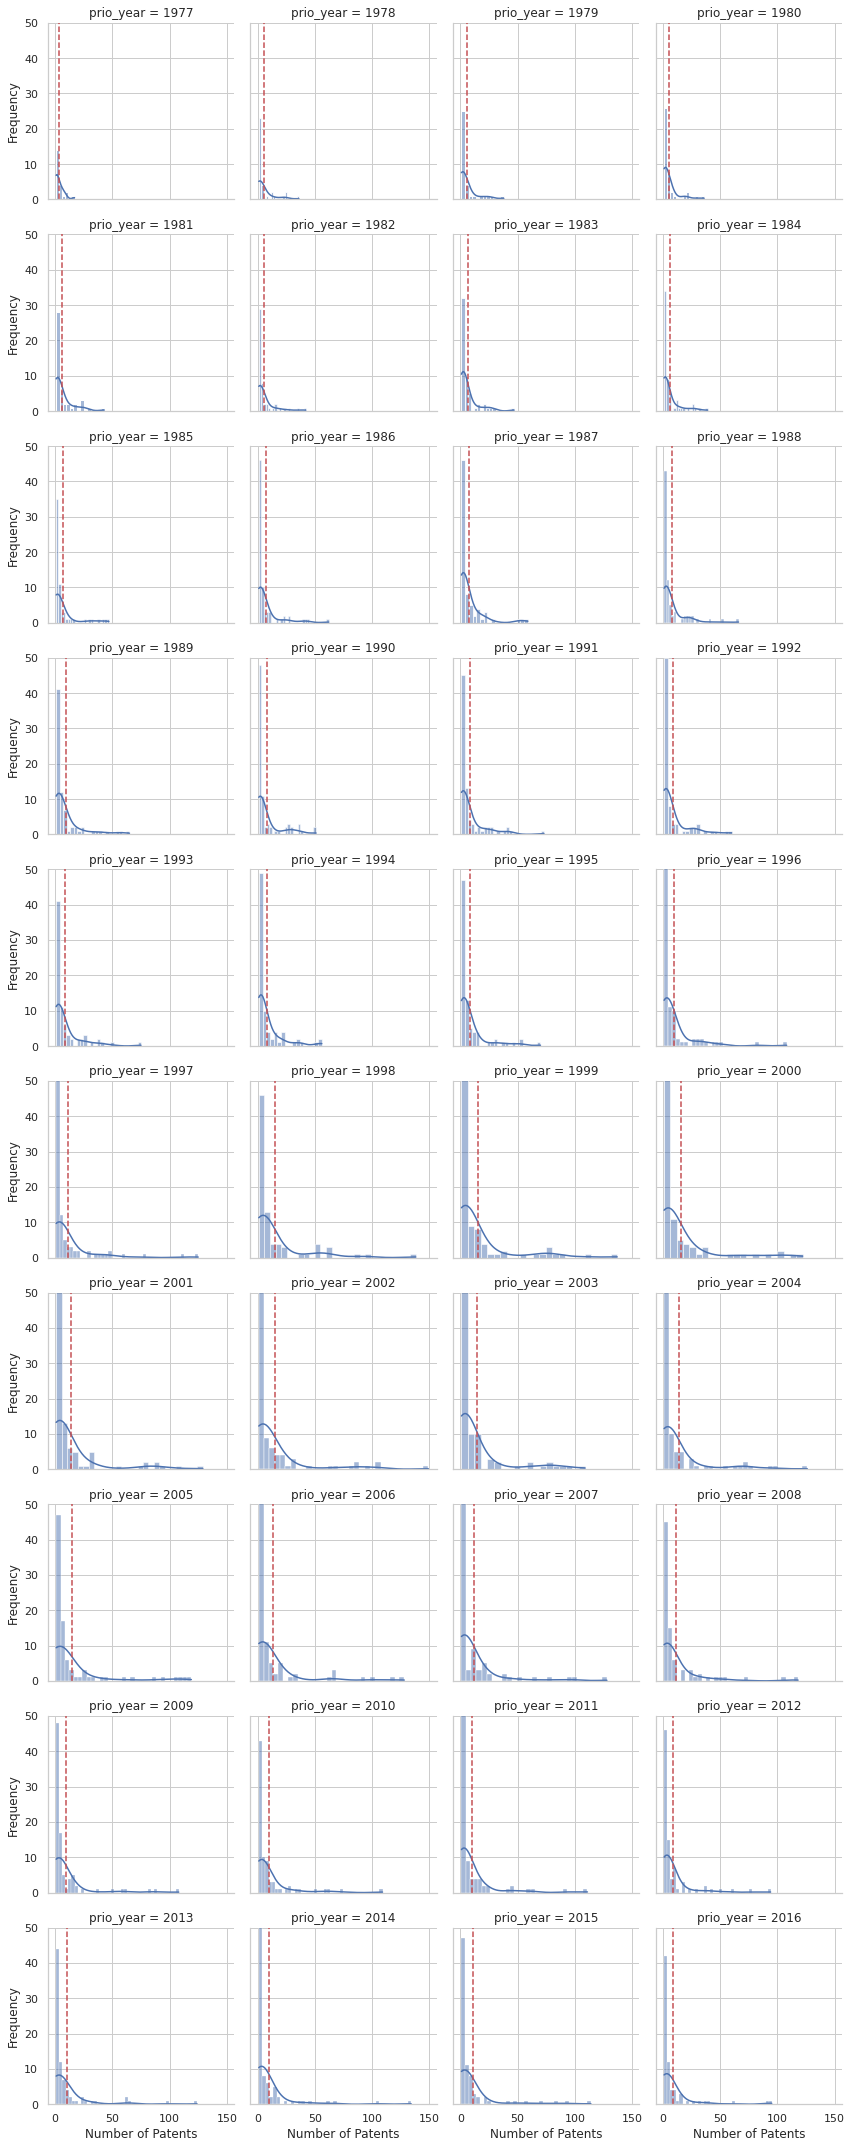

In [452]:
#x-axis: number of patents for each region
#y-axis: frequency of number of patents
def set_xticks(x, **kwargs):
    xticks = plt.xticks()[0]

    n = 10  
    xticks = xticks[::n]

    plt.xticks(xticks)
    
df_grouped = df_da.groupby(['prio_year', 'reg_code']).size().reset_index(name='counts')
# Convert 'prio_year' to categorical so that the plots are ordered by year
df_grouped['prio_year'] = pd.Categorical(df_grouped['prio_year'], ordered=True, categories=sorted(df_grouped['prio_year'].unique()))
# Define a function to plot a vertical line at the mean
def plot_mean(data, **kwargs):
    plt.axvline(data.mean(), color='r', linestyle='--')

# Create a FacetGrid object
g = sns.FacetGrid(df_grouped, col="prio_year", col_wrap=4, height=3, aspect=1)

# Map a histogram to each subplot
g = g.map(sns.histplot, "counts", kde=True)

# Add the mean
g = g.map(plot_mean, "counts")

# Set y-axis limits
g.set(ylim=(0, df_grouped['counts'].quantile(0.95)))

# Set labels
g.set_axis_labels('Number of Patents', 'Frequency')
# g = g.map(set_xticks, "counts")

# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)  # Rotate labels to 90 degrees

# # Adjust the layout
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.5)

plt.savefig('distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [453]:
# df_grouped = df_da.groupby(['prio_year', 'reg_code']).size().reset_index(name='counts')

# # Get the top 10 regions with the most patents
# top_regions = df_grouped.groupby('reg_code')['counts'].sum().nlargest(10).index

# # Filter the DataFrame to include only the top regions
# df_grouped = df_grouped[df_grouped['reg_code'].isin(top_regions)]

# # Convert 'prio_year' to categorical so that the plots are ordered by year
# df_grouped['prio_year'] = pd.Categorical(df_grouped['prio_year'], ordered=True, categories=sorted(df_grouped['prio_year'].unique()))

# # Create a FacetGrid object
# g = sns.FacetGrid(df_grouped, col="prio_year", col_wrap=4, height=3, aspect=1)

# # Map a bar plot to each subplot
# g = g.map(sns.barplot, "reg_code", "counts")

# # Show the plot
# plt.show()


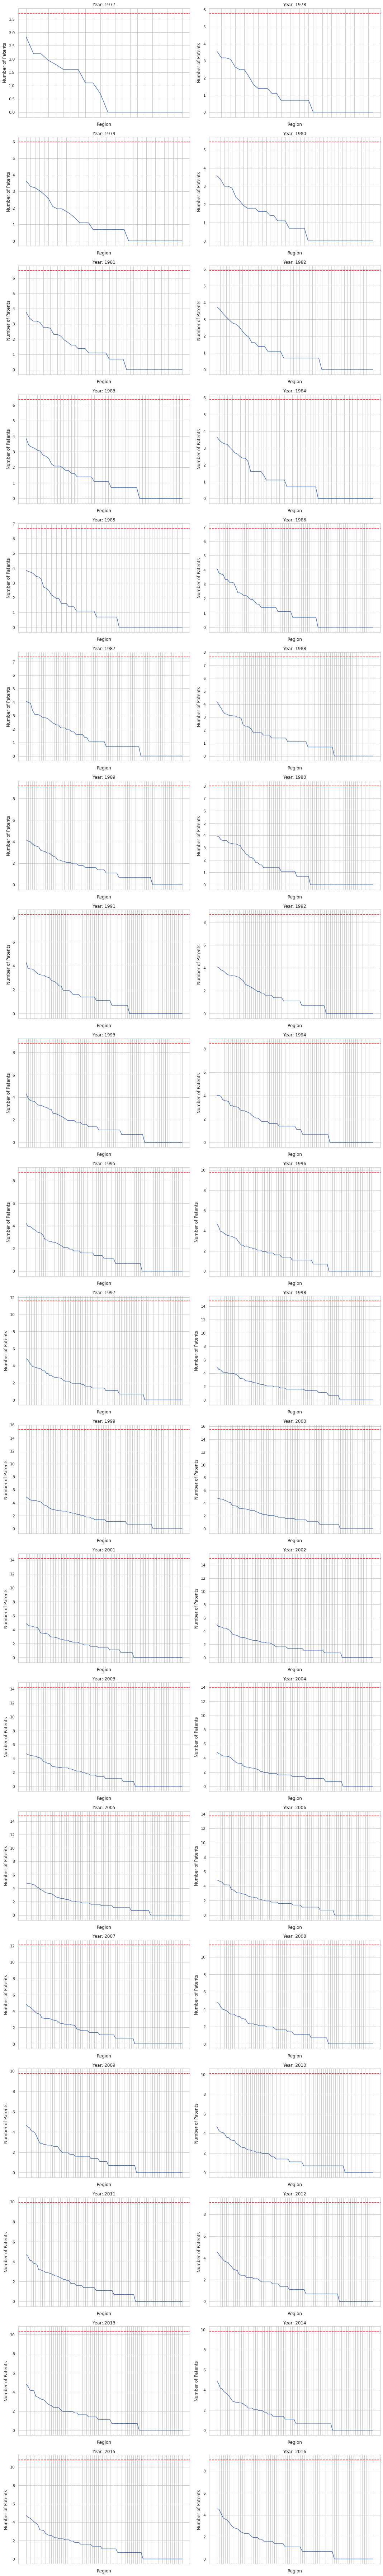

In [454]:
top_regions = df_da['reg_code'].value_counts().index[:5]

# Get the number of unique years
num_years = df_da['prio_year'].nunique()
# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(num_years / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

# Reshape the axes for easy iteration
axs = axs.ravel()

for i, year in enumerate(sorted(df_da['prio_year'].unique())):
    
    df_year = df_da[df_da['prio_year'] == year]
    # Count the number of patents for each region
    df_year_counts = df_year['reg_code'].value_counts().reset_index()
    df_year_counts.columns = ['reg_code', 'counts']
    sns.lineplot(data=df_year_counts, x='reg_code', y=np.log(df_year_counts['counts']), ax=axs[i])
    
    axs[i].set_title(f'Year: {year}')
    
    axs[i].set_xlabel('Region')
    
    axs[i].set_ylabel('Number of Patents')

    # Only label the top 5 regions
    labels = [label if label in top_regions else '' for label in axs[i].get_xticklabels()]
    axs[i].set_xticklabels(labels)

    # Add a horizontal line for the mean
    axs[i].axhline(df_year_counts['counts'].mean(), color='red', linestyle='--')

# If there's an extra subplot, remove it
if num_years % 2 != 0:
    fig.delaxes(axs[-1])
    
plt.tight_layout()

plt.show()


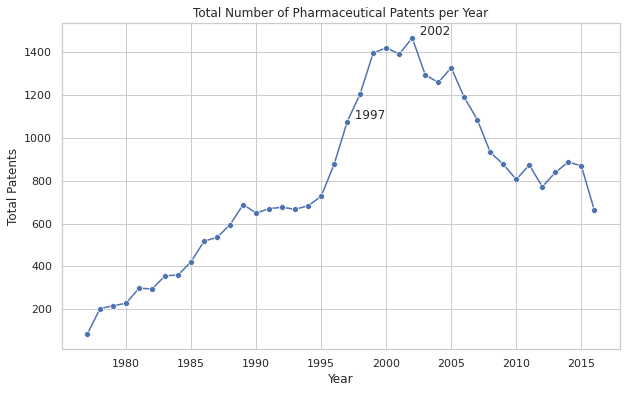

In [464]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_pharma_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_pharma_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['total_pharma_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['total_pharma_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Patents')
ax.set_title('Total Number of Pharmaceutical Patents per Year')
plt.savefig('Total_Patents.png', dpi=300, bbox_inches='tight')
plt.show()


### Pharma/Total

In [426]:
inv = pd.read_csv('data/INV_IPC_SECTION_prior.csv')

In [429]:
inv = inv.drop(['IPC_Section'], axis = 1)
inv = inv.drop_duplicates()

In [438]:
all_patents_yearly = inv.groupby('prio_year')['app_nbr'].count()
all_patents_yearly = all_patents_yearly[0:41]
# all_patents_yearly = all_patents_yearly.reset_index()
# all_patents_yearly

In [465]:
results_df.loc['total_patents'] = all_patents_yearly

In [466]:
results_df.loc['share'] = results_df.loc['total_pharma_patents']/results_df.loc['total_patents']
results_df

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,22.000000,35.000000,36.000000,42.000000,46.000000,50.000000,56.000000,61.000000,63.000000,75.000000,...,90.000000,82.000000,90.000000,80.000000,88.000000,85.000000,81.000000,90.000000,81.000000,74.000000
mean,3.727273,5.800000,6.000000,5.428571,6.478261,5.900000,6.357143,5.901639,6.698413,6.906667,...,12.111111,11.402439,9.744444,10.087500,9.943182,9.094118,10.358025,9.855556,10.765432,8.986486
std,4.014045,8.463764,8.802597,7.893013,9.052290,9.107633,8.969501,8.603691,11.276059,11.501085,...,22.713875,20.936034,19.158453,18.275801,18.791266,16.324553,20.784194,20.598113,21.137213,17.526100
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.250000
50%,1.500000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.000000
75%,5.000000,4.500000,6.250000,5.750000,6.750000,4.750000,6.250000,5.000000,5.000000,5.500000,...,11.000000,9.000000,7.000000,8.250000,9.000000,8.000000,7.000000,8.000000,8.000000,7.000000
max,17.000000,36.000000,38.000000,36.000000,43.000000,42.000000,47.000000,39.000000,47.000000,62.000000,...,128.000000,118.000000,108.000000,109.000000,111.000000,94.000000,124.000000,134.000000,114.000000,95.000000
total_pharma_patents,82.000000,203.000000,216.000000,228.000000,298.000000,295.000000,356.000000,360.000000,422.000000,518.000000,...,1086.000000,933.000000,877.000000,806.000000,874.000000,772.000000,839.000000,887.000000,870.000000,662.000000
change,NaN,121.000000,13.000000,12.000000,70.000000,-3.000000,61.000000,4.000000,62.000000,96.000000,...,-103.000000,-153.000000,-56.000000,-71.000000,68.000000,-102.000000,67.000000,48.000000,-17.000000,-208.000000


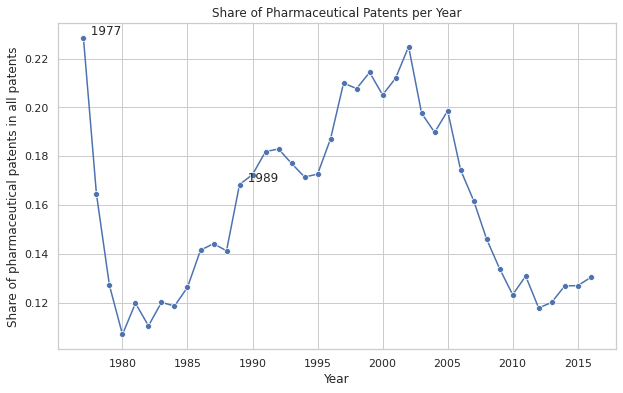

In [467]:
# Calculate the change in share compared to the previous year
results_df.loc['share_change'] = results_df.loc['share'].diff()

# Find the year with the highest share
max_patents_year = results_df.loc['share'].idxmax()

# Find the year with the highest change in share
max_change_year = results_df.loc['share_change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['share'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['share', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['share', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Share of pharmaceutical patents in all patents')
ax.set_title('Share of Pharmaceutical Patents per Year')
plt.savefig('share.png', dpi=300, bbox_inches='tight')
plt.show()



In [468]:
results_df_T = results_df.transpose()

In [473]:
results_df_T.columns.values[0] = 'prio_year'
results_df_T['prio_year'] = pd.to_numeric(results_df_T['prio_year'])

In [485]:
results_df_T = results_df_T.reset_index()

In [486]:
results_df_T.head()

,level_0,prio_year,count,mean,std,min,25%,50%,75%,max,total_pharma_patents,change,total_patents,share,share_change
0,0,1977,22.0,3.727273,4.014045,1.0,1.0,1.5,5.00,17.0,82.0,NaN,359.0,0.228412,NaN
1,1,1978,35.0,5.800000,8.463764,1.0,1.0,2.0,4.50,36.0,203.0,121.0,1233.0,0.164639,-0.063773
2,2,1979,36.0,6.000000,8.802597,1.0,1.0,2.0,6.25,38.0,216.0,13.0,1697.0,0.127283,-0.037356
3,3,1980,42.0,5.428571,7.893013,1.0,1.0,2.0,5.75,36.0,228.0,12.0,2126.0,0.107244,-0.020040
4,4,1981,46.0,6.478261,9.052290,1.0,1.0,3.0,6.75,43.0,298.0,70.0,2483.0,0.120016,0.012772


### how the number of patents in each region has changed over two different time periods:
provide insights into the dynamics of patent activity in different regions and help identify regions where patent activity is increasing or decreasing significantly.

In [493]:
window1 = range(1991, 2002)
window2 = range(2002, 2013)

# Compute the total number of patents in each region for each window
patents_window1 = df_da[df_da['prio_year'].isin(window1)].groupby('reg_code')['app_nbr'].count()/inv[inv['prio_year'].isin(window1)].groupby('reg_code')['app_nbr'].count()
patents_window2 = df_da[df_da['prio_year'].isin(window2)].groupby('reg_code')['app_nbr'].count()/inv[inv['prio_year'].isin(window2)].groupby('reg_code')['app_nbr'].count()

# Compute the change in the number of patents for each region
change_in_patents = patents_window2 - patents_window1
change_in_patents

reg_code
GBZZZ    0.004521
GY000         NaN
IM000   -0.039812
JE000         NaN
UKC11    0.081262
           ...   
UKN01   -0.066176
UKN02    0.061276
UKN03    0.109521
UKN04   -0.096649
UKN05    0.013520
Name: app_nbr, Length: 143, dtype: float64

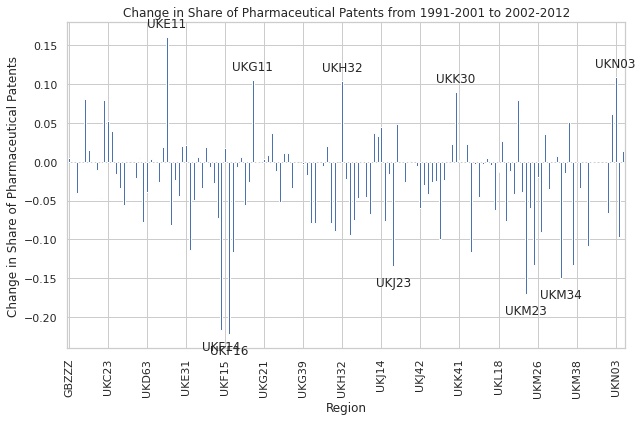

In [494]:
# Plot the change in the number of patents for each region
change_in_patents.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Change in Share of Pharmaceutical Patents')
plt.title('Change in Share of Pharmaceutical Patents from 1991-2001 to 2002-2012')

xticks = plt.xticks()[0]
n = 10 
xticks = xticks[::n]
plt.xticks(xticks)
# Label the top 5 and bottom 5 changes
top5_changes = change_in_patents.nlargest(5)
bottom5_changes = change_in_patents.nsmallest(5)
x_positions_top = [change_in_patents.index.get_loc(i) for i in top5_changes.index]
x_positions_bottom = [change_in_patents.index.get_loc(i) for i in bottom5_changes.index]
for i in range(len(top5_changes)):
    plt.annotate(top5_changes.index[i], (x_positions_top[i], top5_changes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(bottom5_changes)):
    plt.annotate(bottom5_changes.index[i], (x_positions_bottom[i], bottom5_changes.iloc[i]), textcoords="offset points", xytext=(0,-20), ha='center')


plt.show()

In [495]:
change_in_patents

reg_code
GBZZZ    0.004521
GY000         NaN
IM000   -0.039812
JE000         NaN
UKC11    0.081262
           ...   
UKN01   -0.066176
UKN02    0.061276
UKN03    0.109521
UKN04   -0.096649
UKN05    0.013520
Name: app_nbr, Length: 143, dtype: float64

### Spatial Autocorrelation: Global Moran's I

In [496]:
change_in_patents_df = pd.DataFrame(change_in_patents).reset_index()
change_in_patents_df.head()

,reg_code,app_nbr
0,GBZZZ,0.004521
1,GY000,NaN
2,IM000,-0.039812
3,JE000,NaN
4,UKC11,0.081262


In [497]:
new_change = pd.DataFrame(columns=change_in_patents_df.columns)

for idx, row in change_in_patents_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_change = new_change.append(new_row)
    else:
        new_change = new_change.append(row)
new_change = new_change.reset_index(drop=True)
new_change.columns = ['reg_code','change']
new_change.head()

,reg_code,change
0,GBZZZ,0.004521
1,GY000,NaN
2,IM000,-0.039812
3,JE000,NaN
4,UKC11,0.081262


In [498]:
new_change.to_csv('Change_New.csv', index = False)

In [228]:
import geopandas as gpd

file_path = 'Palma72H/NUTS_RG_20M_2021_3035.shp/NUTS_RG_20M_2021_3035.shp'

gdf = gpd.read_file(file_path)

print(gdf.head())

  NUTS_ID  LEVL_CODE CNTR_CODE     NAME_LATN     NUTS_NAME  MOUNT_TYPE  \
0      FR          0        FR        France        France         0.0   
1      HR          0        HR      Hrvatska      Hrvatska         0.0   
2      HU          0        HU  Magyarország  Magyarország         0.0   
3      AL          0        AL     Shqipëria     Shqipëria         0.0   
4      AT          0        AT    Österreich    Österreich         0.0   

   URBN_TYPE  COAST_TYPE FID  \
0          0           0  FR   
1          0           0  HR   
2          0           0  HU   
3          0           0  AL   
4          0           0  AT   

                                            geometry  
0  MULTIPOLYGON (((9954236.116 -3059379.316, 9961...  
1  MULTIPOLYGON (((4827385.889 2618351.326, 48483...  
2  POLYGON ((5214660.069 2880853.832, 5216710.220...  
3  POLYGON ((5129579.170 2204098.752, 5148385.473...  
4  POLYGON ((4742889.368 2876362.725, 4783217.798...  


In [499]:
change_gdf = new_change.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
change_gdf.head()

,reg_code,change,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.004521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,-0.039812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,0.081262,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [409]:
print(change_gdf['NUTS_ID'].isna().sum())

8


In [500]:
change_gdf = change_gdf.dropna(subset=['geometry'])


In [501]:
print(change_gdf['NUTS_ID'].isna().sum())

0


In [412]:
print(change_gdf['change'].isna().sum())

8


In [502]:
change_gdf = change_gdf.dropna(subset=['change'])

In [503]:
change_gdf = gpd.GeoDataFrame(change_gdf, geometry='geometry')

In [504]:
import pysal.lib as ps

w = ps.weights.Queen.from_dataframe(change_gdf)

In [505]:
from pysal.explore import esda
moran = esda.Moran(change_gdf['change'], w)

('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')


In [506]:
print('Moran\'s I: ', moran.I)

Moran's I:  0.11662896882963704


#### low, but positive, spatial autocorrelation, regions with similar values tend to be located near each other more often than that would be expected if the data were randomly distributed, but the correlation is not very strong

### Location Quotient

In [215]:
inv = inv[['app_nbr','reg_code','prio_year']]
inv = inv.drop_duplicates()
inv.head()

,app_nbr,reg_code,prio_year
0,EP19780100247,UKK30,1977
1,EP19780100395,UKJ42,1977
3,EP19780100400,UKH33,1977
4,EP19780100463,UKJ42,1977
6,EP19780100492,UKJ22,1977


In [216]:
# Compute the number of pharmaceutical patents for each region
pharma_patents_region = df_da.groupby('reg_code')['app_nbr'].count()

# Compute the total number of patents for each region
total_patents_region = inv.groupby('reg_code')['app_nbr'].count()

# Compute the number of pharmaceutical patents for the UK
pharma_patents_UK = df_da['app_nbr'].count()

# Compute the total number of patents for the UK
total_patents_UK = inv['app_nbr'].count()


In [217]:
# Compute the percentage of pharmaceutical patents to all patents in each region
perc_pharma_region = pharma_patents_region / total_patents_region

# Compute the percentage of pharmaceutical patents to all patents in the UK
perc_pharma_UK = pharma_patents_UK / total_patents_UK

# Compute the location quotient for each region
LQ = perc_pharma_region / perc_pharma_UK
LQ

reg_code
GBZZZ    0.878689
GY000    0.254068
IM000    0.171052
JE000    0.103039
UKC11    1.101636
           ...   
UKN01    1.165518
UKN02    0.713344
UKN03    1.193740
UKN04    0.893829
UKN05    0.551992
Name: app_nbr, Length: 143, dtype: float64

In [226]:
# Check for NaN values
nan_rows = LQ[LQ.isna()]
nan_rows

reg_code
UKD41   NaN
UKD42   NaN
UKM32   NaN
UKM65   NaN
UKM66   NaN
Name: app_nbr, dtype: float64

In [229]:
LQ = LQ.dropna()
len(LQ)

138

In [236]:
LQ_df = pd.DataFrame(LQ)
LQ_df = LQ_df.reset_index()
LQ_df.head()

,reg_code,app_nbr
0,GBZZZ,0.878689
1,GY000,0.254068
2,IM000,0.171052
3,JE000,0.103039
4,UKC11,1.101636


In [237]:
print(LQ_df['reg_code'].isna().sum())

0


In [246]:
LQ_gdf = LQ_df.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')

In [247]:
LQ_gdf.head()

,reg_code,app_nbr,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.878689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.254068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.171052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,0.103039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,1.101636,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [248]:
print(LQ_gdf['NUTS_ID'].isna().sum())

40


In [250]:
no_nuts = LQ_gdf[LQ_gdf['NUTS_ID'].isna()]
len(no_nuts)

40

In [253]:
no_nuts['reg_code']

0      GBZZZ
1      GY000
2      IM000
3      JE000
13     UKD31
14     UKD32
15     UKD43
61     UKH13
69     UKH33
70     UKI11
71     UKI12
72     UKI21
73     UKI22
74     UKI23
81     UKJ23
82     UKJ24
85     UKJ33
88     UKJ42
94     UKK21
95     UKK22
113    UKM21
114    UKM22
115    UKM23
116    UKM24
117    UKM25
118    UKM26
119    UKM27
120    UKM28
121    UKM31
122    UKM33
123    UKM34
124    UKM35
125    UKM36
126    UKM37
127    UKM38
133    UKN01
134    UKN02
135    UKN03
136    UKN04
137    UKN05
Name: reg_code, dtype: object

Old: New:
UKK21: UKK24;
UKK22: UKK25;
UKM21: UKM71;
UKM22: UKM72;
UKM23: UKM73;
UKM25: UKM75;
UKM26: UKM76;
UKM27: UKM77;
UKM28: UKM78;
UKM31: UKM81;
UKM34: UKM82;
UKM35: UKM83;
UKM36: UKM84;
UKM24: UKM91;
UKM33: UKM93;
UKM37: UKM94;
UKM38: UKM95;
UKN01: UKN06;
UKD31: UKD33, UKD34, UKD35;
UKD32: UKD36, UKD37;
UKD43: UKD44, UKD45, UKD46, UKD47;
UKH13: UKH15, UKH16, UKH17;
UKH33: UKH34, UKH35, UKH36, UKH37;
UKI11: UKI31, UKI32, UKI33, UKI34;
UKI12: UKI41, UKI42, UKI43, UKI44, UKI45;
UKI21: UKI51, UKI52, UKI53, UKI54;
UKI22: UKI61, UKI62, UKI63;
UKI23: UKI71, UKI72, UKI73, UKI74, UKI75;
UKJ23: UKJ25, UKJ26;
UKJ24: UKJ27, UKJ28;
UKJ33: UKJ35, UKJ36, UKJ37;
UKJ42: UKJ43, UKJ44, UKJ45, UKJ46;
0--3, 134--137；
GBZZZ	EXTRA-REGIO NUTS 3 (United Kingdom)
UKN02 -- UKN05: discontinued

In [257]:
row = gdf[gdf['NUTS_ID'] == 'UKN05']
row

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry


In [258]:
new_df = pd.DataFrame(columns=LQ_df.columns)

for idx, row in LQ_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_df = new_df.append(new_row)
    else:
        new_df = new_df.append(row)
new_df = new_df.reset_index(drop=True)
new_df.head()

,reg_code,app_nbr
0,GBZZZ,0.878689
1,GY000,0.254068
2,IM000,0.171052
3,JE000,0.103039
4,UKC11,1.101636


In [259]:
LQ_gdf = new_df.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
LQ_gdf.head()

,reg_code,app_nbr,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.878689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.254068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.171052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,0.103039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,1.101636,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [260]:
print(LQ_gdf['NUTS_ID'].isna().sum())

8


In [266]:
len(LQ_gdf)

172

In [265]:
uk_gdf = gdf[gdf['CNTR_CODE'].str.contains('UK')]
print(len(uk_gdf))
print(uk_gdf.head())

233
    NUTS_ID  LEVL_CODE CNTR_CODE             NAME_LATN             NUTS_NAME  \
42       UK          0        UK        United Kingdom        United Kingdom   
187     UKJ          1        UK  South East (England)  South East (England)   
188     UKK          1        UK  South West (England)  South West (England)   
189     UKL          1        UK                 Wales                 Wales   
190     UKM          1        UK              Scotland              Scotland   

     MOUNT_TYPE  URBN_TYPE  COAST_TYPE  FID  \
42          0.0          0           0   UK   
187         0.0          0           0  UKJ   
188         0.0          0           0  UKK   
189         0.0          0           0  UKL   
190         0.0          0           0  UKM   

                                              geometry  
42   MULTIPOLYGON (((3643416.574 3198789.397, 36397...  
187  MULTIPOLYGON (((3598326.240 3274989.145, 35918...  
188  MULTIPOLYGON (((3523551.545 3272636.347, 35168...  
189 

In [510]:
# # Set the CRS of LQ_gdf to match the CRS of uk_gdf
# LQ_gdf = gpd.GeoDataFrame(LQ_gdf, geometry='geometry')
# LQ_gdf = LQ_gdf.to_crs(uk_gdf.crs)

# # Now you can plot your data
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# # Create the base map
# base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# # Add regions to the base map
# LQ_gdf.plot(ax=base, column='app_nbr', cmap='YlOrRd')

# # Move the legend to the right
# leg = ax.get_legend()

# # Label regions
# # Find the top 10 regions
# top10 = LQ_gdf.nlargest(10, 'app_nbr')
# top10_colors = top10['app_nbr']

# cmap = plt.get_cmap('YlOrRd')

# # Get min and max citation counts for normalization
# vmin = LQ_gdf['app_nbr'].min()
# vmax = LQ_gdf['app_nbr'].max()

# # Generate legend elements
# legend_elements = []

# # Add top 10 regions to the legend
# for idx, row in top10.iterrows():
#     color = cmap((row['app_nbr'] - vmin) / (vmax - vmin))
#     patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
#     legend_elements.append(patch)
#     ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

# # Create the legend
# ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 LQ')

# plt.savefig('LQ_map.png', dpi=300, bbox_inches='tight')

# plt.show()



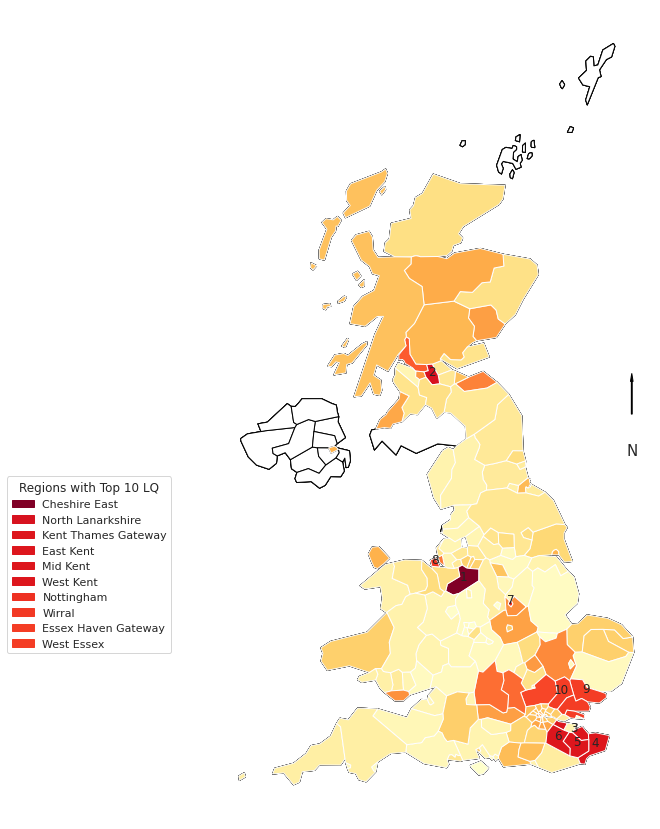

In [509]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
LQ_gdf = gpd.GeoDataFrame(LQ_gdf, geometry='geometry')
LQ_gdf = LQ_gdf.to_crs(uk_gdf.crs)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
LQ_gdf.plot(ax=base, column='app_nbr', cmap='YlOrRd')
leg = ax.get_legend()
top10 = LQ_gdf.nlargest(10, 'app_nbr')
top10_colors = top10['app_nbr']
cmap = plt.get_cmap('YlOrRd')
vmin = LQ_gdf['app_nbr'].min()
vmax = LQ_gdf['app_nbr'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['app_nbr'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 LQ')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('LQ_map.png', dpi=300, bbox_inches='tight')
plt.show()


### Network

In [20]:
G = pd.read_csv('data/Citation_Network.csv')
G.head()

,Citing_app_nbr,Cited_App_nbr
0,EP19790300237,EP19780300148
1,EP19790301143,EP19780100823
2,EP19790301145,EP19780100823
3,EP19790301144,EP19780100823
4,EP19790301142,EP19780100823


In [21]:
citation = pd.read_csv('data/Merged_UK.csv')
citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited
0,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKI23,1977
1,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKJ13,1977
2,EP19790301143,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977
3,EP19790301145,EP19780100823,A61K031/415,UKH33,1978.0,A61K,UKJ42,1977
4,EP19790301144,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977


In [275]:
# new_citation = pd.DataFrame(columns=citation.columns)

# for idx, row in citation.iterrows():
#     if row['reg_code_citing'] in mapping_dict:
#         for new_code in mapping_dict[row['reg_code_citing']]:
#             # Create a new row with the new region code and the same values
#             new_row = row.copy()
#             new_row['reg_code_citing'] = new_code
#             new_citation = new_citation.append(new_row)
#     else:
#         new_citation = new_citation.append(row)
# new_citation = new_citation.reset_index(drop=True)
# new_citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited,is_self_citation
0,EP19790300237,EP19780300148,A61K031/43,UKI71,1978.0,A61K031/41,UKI23,1977,True
1,EP19790300237,EP19780300148,A61K031/43,UKI72,1978.0,A61K031/41,UKI23,1977,True
2,EP19790300237,EP19780300148,A61K031/43,UKI73,1978.0,A61K031/41,UKI23,1977,True
3,EP19790300237,EP19780300148,A61K031/43,UKI74,1978.0,A61K031/41,UKI23,1977,True
4,EP19790300237,EP19780300148,A61K031/43,UKI75,1978.0,A61K031/41,UKI23,1977,True


### Citing Patents Map

In [511]:
citing = citation[['Citing_app_nbr','reg_code_citing','prio_year_citing']]
citing = citing.drop_duplicates()
citing.head()

,Citing_app_nbr,reg_code_citing,prio_year_citing
0,EP19790300237,UKI23,1978.0
2,EP19790301143,UKH23,1978.0
3,EP19790301145,UKH33,1978.0
4,EP19790301144,UKH23,1978.0
5,EP19790301142,UKH33,1978.0


In [512]:
new_citing = pd.DataFrame(columns=citing.columns)

for idx, row in citing.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_citing = new_citing.append(new_row)
    else:
        new_citing = new_citing.append(row)
new_citing = new_citing.reset_index(drop=True)
new_citing.head()

,Citing_app_nbr,reg_code_citing,prio_year_citing
0,EP19790300237,UKI71,1978.0
1,EP19790300237,UKI72,1978.0
2,EP19790300237,UKI73,1978.0
3,EP19790300237,UKI74,1978.0
4,EP19790300237,UKI75,1978.0


In [284]:
new_citing.to_csv('data/Citing_New.csv', index= False)

In [513]:
# Count the number of patents for each region
patent_counts = new_citing.groupby('reg_code_citing')['Citing_app_nbr'].count()
patent_counts

reg_code_citing
GBZZZ    118
UKC11      9
UKC12      2
UKC13      2
UKC14     13
        ... 
UKN02      1
UKN03     17
UKN04      1
UKN05      2
UKN06      1
Name: Citing_app_nbr, Length: 149, dtype: int64

In [514]:
# Count the number of unique years for each region
year_counts_citing = new_citing.groupby('reg_code_citing')['prio_year_citing'].nunique().reset_index()

# Rename the columns
year_counts_citing.columns = ['reg_code_citing', 'year_count']

year_counts_citing


,reg_code_citing,year_count
0,GBZZZ,27
1,UKC11,5
2,UKC12,2
3,UKC13,1
4,UKC14,9
...,...,...
144,UKN02,1
145,UKN03,8
146,UKN04,1
147,UKN05,2


In [515]:
# Convert the series to a DataFrame
patent_counts_df = patent_counts.reset_index()

# Rename the columns
patent_counts_df.columns = ['reg_code_citing', 'Total_Patent_Count']

patent_counts_df = patent_counts_df.merge(year_counts_citing, on = 'reg_code_citing', how = 'left')
print(patent_counts_df['year_count'].isna().sum())

0


In [516]:
patent_counts_df['normalized_patent_counts'] = patent_counts_df['Total_Patent_Count'] / patent_counts_df['year_count']

citing_counts_gdf = patent_counts_df.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

citing_counts_gdf.head()

,reg_code_citing,Total_Patent_Count,year_count,normalized_patent_counts,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,118,27,4.370370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,UKC11,9,5,1.800000,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."
2,UKC12,2,2,1.000000,UKC12,3.0,UK,South Teesside,South Teesside,4.0,1.0,1.0,UKC12,"POLYGON ((3625708.122 3546887.147, 3616038.678..."
3,UKC13,2,1,2.000000,UKC13,3.0,UK,Darlington,Darlington,4.0,1.0,2.0,UKC13,"POLYGON ((3585028.631 3557236.128, 3583327.063..."
4,UKC14,13,9,1.444444,UKC14,3.0,UK,Durham CC,Durham CC,4.0,1.0,1.0,UKC14,"POLYGON ((3582515.806 3590052.703, 3587447.069..."


In [517]:
print(citing_counts_gdf['NUTS_ID'].isna().sum())

5


In [518]:
len(citing_counts_gdf)

149

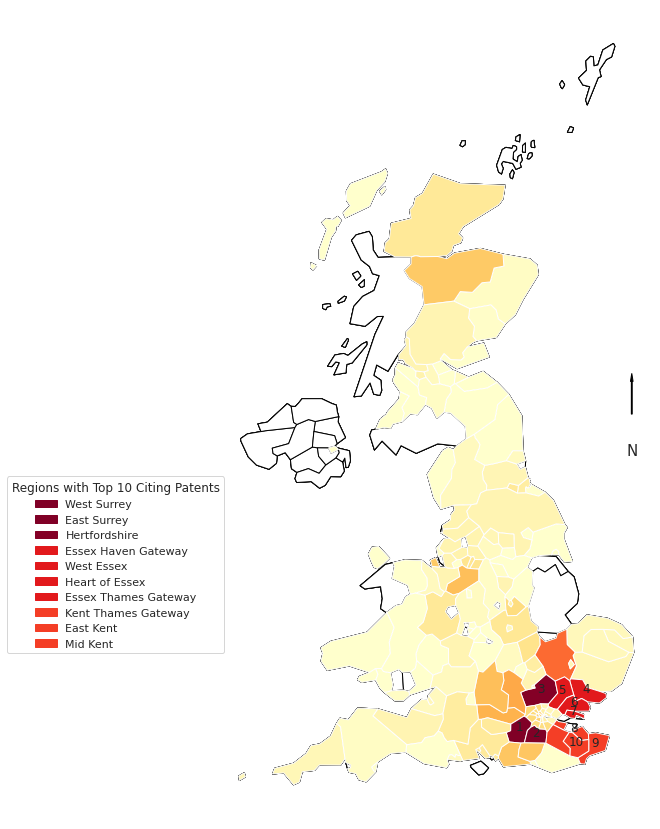

In [521]:
# Set the CRS of LQ_gdf to match the CRS of uk_gdf
citing_counts_gdf = gpd.GeoDataFrame(citing_counts_gdf, geometry='geometry')
citing_counts_gdf = citing_counts_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
citing_counts_gdf.plot(ax=base, column='normalized_patent_counts', cmap='YlOrRd')
leg = ax.get_legend()
top10 = citing_counts_gdf.nlargest(10, 'normalized_patent_counts')
top10_colors = top10['normalized_patent_counts']
cmap = plt.get_cmap('YlOrRd')
vmin = citing_counts_gdf['normalized_patent_counts'].min()
vmax = citing_counts_gdf['normalized_patent_counts'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['normalized_patent_counts'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Citing Patents')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('Citing_map.png', dpi=300, bbox_inches='tight')
plt.show()

## Most Influential Patents

In [22]:
import networkx as nx
graph = nx.from_pandas_edgelist(G, source='Citing_app_nbr', target='Cited_App_nbr', create_using=nx.DiGraph())

in_degrees = graph.in_degree()

# Find the node with the highest in-degree
most_cited_node = max(in_degrees, key=lambda x: x[1])

print(f"The most cited patent is {most_cited_node[0]} with {most_cited_node[1]} citations.")


The most cited patent is EP19870302620 with 55 citations.


In [97]:
in_degrees_dict = dict(graph.in_degree())

sorted_nodes = sorted(in_degrees_dict, key=in_degrees_dict.get, reverse=True)

N = 50 
top_nodes = sorted_nodes[:N]

# Get all nodes that are directly connected to the top nodes
connected_nodes = set()
for node in top_nodes:
    connected_nodes.update(graph.predecessors(node))

# Create a subgraph with the top nodes and their connected nodes
G_sub = graph.subgraph(list(connected_nodes))

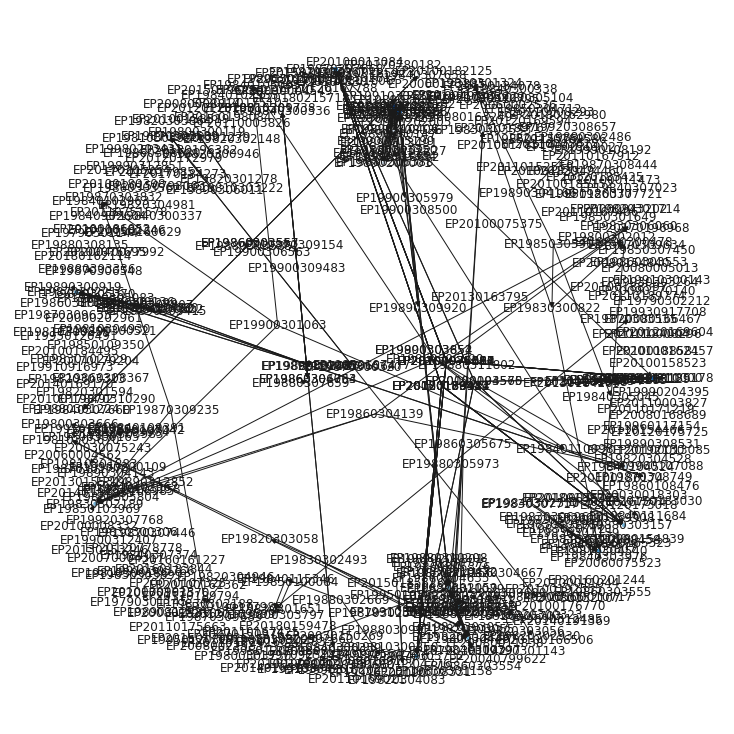

In [98]:
# # Create a color map that is proportional to the in-degrees
# colors = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create a spring layout
pos = nx.spring_layout(G_sub)

plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()

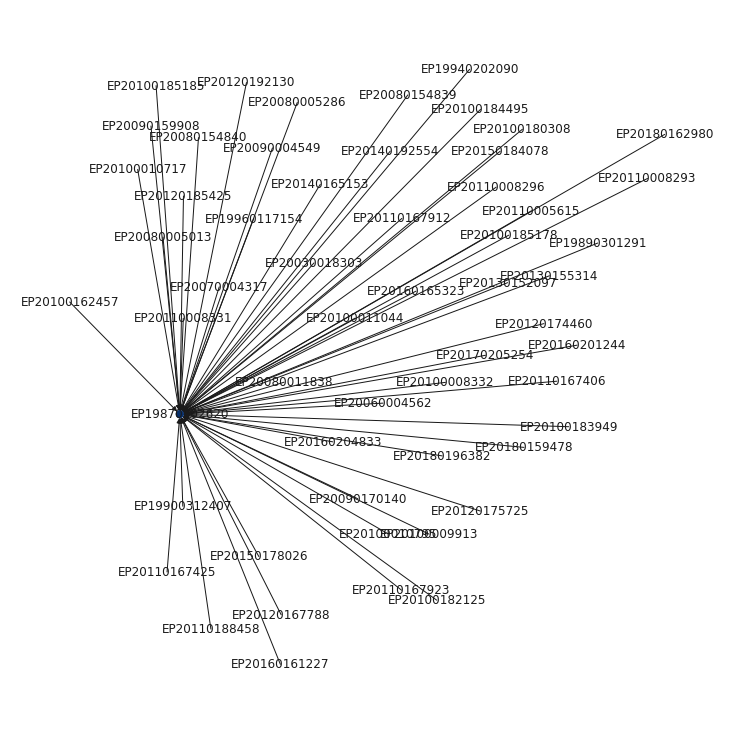

In [84]:
# Identify the node with the highest in-degree
top_node = max(in_degrees_dict, key=in_degrees_dict.get)

# Get all nodes that are directly connected to the top node
connected_nodes = list(graph.predecessors(top_node))

# Add the top node to the list of connected nodes
connected_nodes.append(top_node)

# Create a subgraph with the top node and its connected nodes
G_sub = graph.subgraph(connected_nodes)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create the plot
plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()


In [99]:
# Convert the directed graph to an undirected graph
G_undirected = graph.to_undirected()
connected_components = nx.connected_components(G_undirected)

# Get the largest connected component (GCC)
GCC = max(connected_components, key=len)

# Create a subgraph with the nodes in the GCC
G_GCC = graph.subgraph(GCC)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_GCC = [in_degrees_dict.get(n, 0) for n in G_GCC.nodes()]

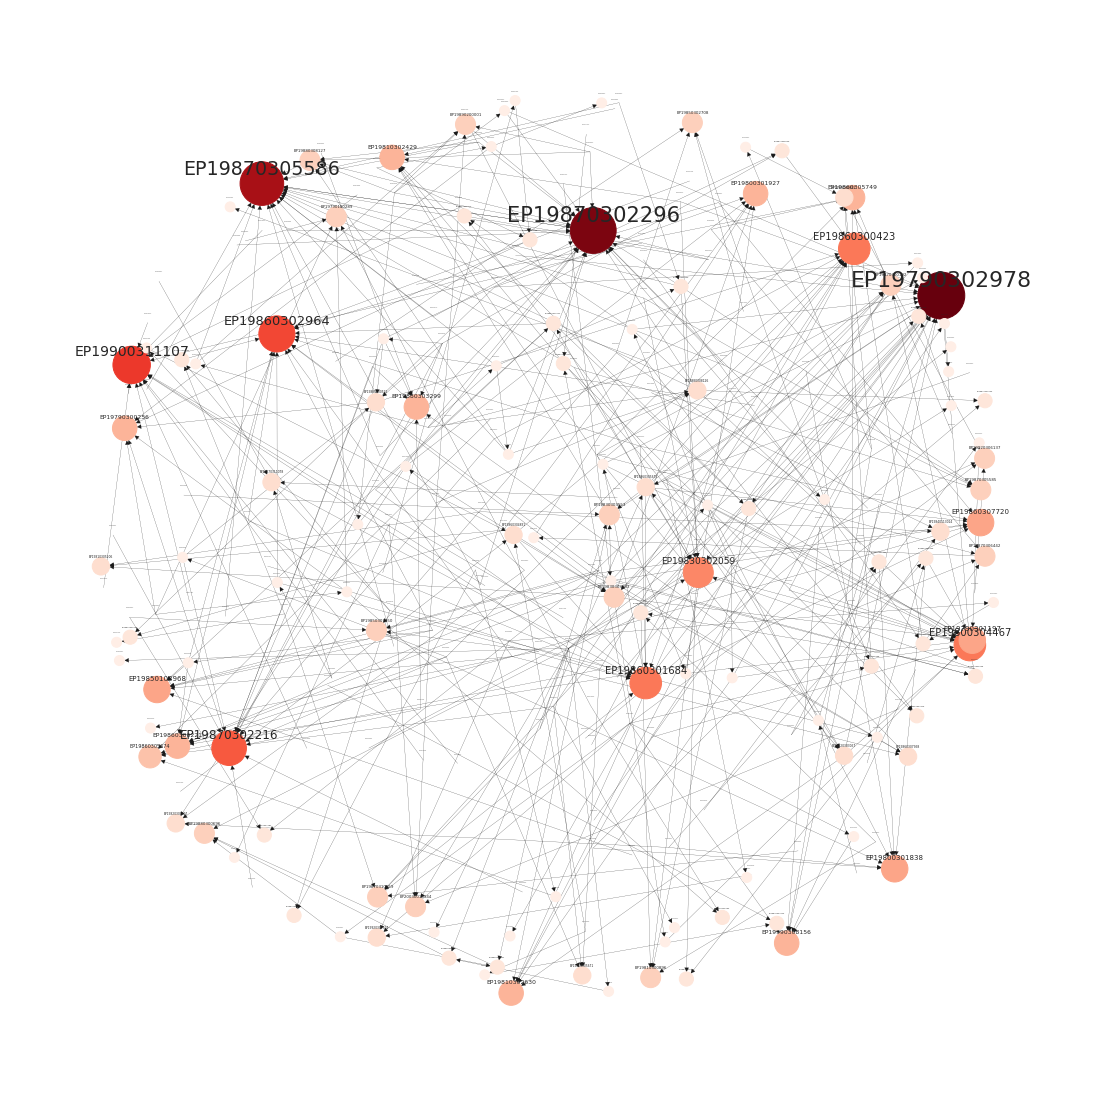

In [110]:
# Normalize the in-degrees for the color map
colors = [(in_degrees_dict.get(n, 0) - min(in_degrees_GCC)) / (max(in_degrees_GCC) - min(in_degrees_GCC)) for n in G_GCC.nodes()]

# Create a spring layout with a larger optimal distance between nodes
pos = nx.spring_layout(G_GCC, k=0.5)

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G_GCC, pos, node_size=[i * 100 for i in in_degrees_GCC], node_color=colors, with_labels=False, cmap=plt.cm.Reds, width=0.2)

# Add labels with font size proportional to in-degree
for node, (x, y) in pos.items():
    plt.text(x, y+0.02, s=node, fontsize=in_degrees_dict.get(node, 0), horizontalalignment='center')
plt.savefig('network.png', dpi=300, bbox_inches='tight')
plt.show()

In [299]:
# Convert the in-degrees to a DataFrame
in_degrees_df = pd.DataFrame(in_degrees, columns=['Cited_App_nbr', 'in_degree'])

# Merge the in-degrees DataFrame with location
merged_df = pd.merge(in_degrees_df, citation[['Cited_App_nbr', 'reg_code_Cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
# Select rows where 'in_degree' is not 0
merged_df = merged_df[merged_df['in_degree'] != 0]
merged_df = pd.merge(merged_df, citation[['Cited_App_nbr', 'prio_year_cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
print(merged_df)

      Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited
0     EP19780300148          3          UKI23             1977
1     EP19780300148          3          UKJ13             1977
2     EP19780100823          6          UKJ42             1977
3     EP19790301145          1          UKH33             1978
4     EP19790301142          1          UKH33             1978
...             ...        ...            ...              ...
2336  EP20130789610          1          UKD31             2012
2337  EP20150734640          1          UKG32             2014
2338  EP20150734640          1          UKJ13             2014
2339  EP20150734640          1          UKG13             2014
2340  EP20170717172          1          UKD71             2016

[2341 rows x 4 columns]


In [24]:
merged_df.sort_values(by='in_degree', ascending=False)

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
738,EP19870302620,55,GBZZZ,1986
1356,EP19840301996,26,UKJ33,1983
1354,EP19840301996,26,UKJ11,1983
1355,EP19840301996,26,UKJ13,1983
1365,EP19820300416,22,UKD61,1981
...,...,...,...,...
1140,EP19940302040,1,UKJ23,1993
1139,EP19940301513,1,UKE22,1993
1138,EP19930303360,1,UKD43,1992
1134,EP19900301135,1,UKD63,1989


In [30]:

row = df.loc[df['app_nbr'] == 'EP19870302620']
print(row.head())


             app_nbr    appln_id  person_id              inv_name  \
14088  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14089  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14090  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14091  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14092  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   

                             address reg_code ctry_code  prio_year  app_year  \
14088  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14089  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14090  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14091  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14092  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   

               IPC  
14088  A61K039/395  
14089  C07K014/005  
14090  C07K014/195  
14091   C07K016/00  

In [300]:
new_cited = pd.DataFrame(columns=merged_df.columns)

for idx, row in merged_df.iterrows():
    if row['reg_code_Cited'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_Cited']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_Cited'] = new_code
            new_cited = new_cited.append(new_row)
    else:
        new_cited = new_cited.append(row)
new_cited = new_cited.reset_index(drop=True)
new_cited.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
0,EP19780300148,3,UKI71,1977
1,EP19780300148,3,UKI72,1977
2,EP19780300148,3,UKI73,1977
3,EP19780300148,3,UKI74,1977
4,EP19780300148,3,UKI75,1977


In [523]:
# Compute the total number of citations for each year
total_citations_per_year = new_cited.groupby('prio_year_cited')['in_degree'].sum()

# Compute the cumulative total number of citations from each year to the last year in the dataset
cumulative_citations = total_citations_per_year[::-1].cumsum()[::-1]

# Map the cumulative total number of citations to each patent
new_cited['cumulative_citations'] = new_cited['prio_year_cited'].map(cumulative_citations)

# Compute the normalized citation counts
new_cited['normalized_citations'] = new_cited['in_degree'] / new_cited['cumulative_citations']


In [525]:
new_cited.tail()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,cumulative_citations,normalized_citations
4426,EP20130789610,1,UKD35,2012,37,0.027027
4427,EP20150734640,1,UKG32,2014,5,0.2
4428,EP20150734640,1,UKJ13,2014,5,0.2
4429,EP20150734640,1,UKG13,2014,5,0.2
4430,EP20170717172,1,UKD71,2016,1,1.0


In [526]:
new_cited.to_csv('data/Cited_New.csv', index= False)

In [527]:
# Merge region_citation_counts_df and gdf
merged_gdf = new_cited.merge(gdf, left_on='reg_code_Cited', right_on='NUTS_ID', how='left')

In [528]:
print(merged_gdf['NUTS_ID'].isna().sum())

116


In [303]:
len(merged_gdf)

4431

In [33]:
# merged_gdf=merged_gdf.dropna(subset=['geometry'])
# merged_gdf = merged_gdf.sort_values(by='in_degree', ascending=False)

In [529]:
merged_gdf.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,cumulative_citations,normalized_citations,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,EP19780300148,3,UKI71,1977,8329,0.00036,UKI71,3.0,UK,Barnet,Barnet,4.0,1.0,2.0,UKI71,"POLYGON ((3621270.738 3215351.894, 3618461.047..."
1,EP19780300148,3,UKI72,1977,8329,0.00036,UKI72,3.0,UK,Brent,Brent,4.0,1.0,2.0,UKI72,"POLYGON ((3615301.727 3209998.023, 3616517.083..."
2,EP19780300148,3,UKI73,1977,8329,0.00036,UKI73,3.0,UK,Ealing,Ealing,4.0,1.0,2.0,UKI73,"POLYGON ((3612695.776 3207851.368, 3611748.222..."
3,EP19780300148,3,UKI74,1977,8329,0.00036,UKI74,3.0,UK,Harrow and Hillingdon,Harrow and Hillingdon,4.0,1.0,2.0,UKI74,"POLYGON ((3612325.172 3215508.784, 3606950.980..."
4,EP19780300148,3,UKI75,1977,8329,0.00036,UKI75,3.0,UK,Hounslow and Richmond upon Thames,Hounslow and Richmond upon Thames,4.0,1.0,1.0,UKI75,"POLYGON ((3612135.825 3202967.984, 3613362.223..."


The most cited patent does not have a valid region code. So use the detailed address:

In [530]:

row = df.loc[df['app_nbr'] == 'EP19870302620']
print(row.head())


       Unnamed: 0        app_nbr    appln_id  person_id              inv_name  \
14088       14088  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14089       14089  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14090       14090  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14091       14091  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14092       14092  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   

                             address reg_code ctry_code  prio_year  app_year  \
14088  64 Cavendish Avenue,Cambridge    GBZZZ        GB     1986.0    1987.0   
14089  64 Cavendish Avenue,Cambridge    GBZZZ        GB     1986.0    1987.0   
14090  64 Cavendish Avenue,Cambridge    GBZZZ        GB     1986.0    1987.0   
14091  64 Cavendish Avenue,Cambridge    GBZZZ        GB     1986.0    1987.0   
14092  64 Cavendish Avenue,Cambridge    GBZZZ        GB     1986.0    1987.0   

               IPC  
14088  A61K

In [531]:
merged_df.to_csv('data/In_dgree.csv', index=False)

## Most Influential Regions

In [532]:
# Group by 'reg_code_cited' and sum the in_dgree
region_citation_counts = new_cited.groupby('reg_code_Cited')['normalized_citations'].sum()

# Print the result
print(region_citation_counts)

reg_code_Cited
GBZZZ     0.07664
GY000    0.000824
IM000     0.00847
UKC11    0.001671
UKC12    0.003185
           ...   
UKN02     0.00482
UKN03    0.463839
UKN04    0.001496
UKN05    0.000184
UKN06    0.002474
Name: normalized_citations, Length: 161, dtype: object


In [538]:
# Convert the series to a DataFrame
region_citation_counts_df = region_citation_counts.reset_index()

# Rename the columns
region_citation_counts_df.columns = ['reg_code_cited', 'normalized_citation_counts']
region_citation_counts_df

,reg_code_cited,normalized_citation_counts
0,GBZZZ,0.07664
1,GY000,0.000824
2,IM000,0.00847
3,UKC11,0.001671
4,UKC12,0.003185
...,...,...
156,UKN02,0.00482
157,UKN03,0.463839
158,UKN04,0.001496
159,UKN05,0.000184


In [535]:
# # Count the number of unique years for each region
# year_counts_cited = new_cited.groupby('reg_code_Cited')['prio_year_cited'].nunique().reset_index()

# # Rename the columns
# year_counts_cited.columns = ['reg_code_cited', 'year_count']

# year_counts_cited

In [536]:
# region_citation_counts_df = region_citation_counts_df.merge(year_counts_cited, on = 'reg_code_cited', how = 'left')
# print(region_citation_counts_df['year_count'].isna().sum())

In [38]:
# region_citation_counts_df['reg_code_cited'] = region_citation_counts_df['reg_code_cited'].astype(str)
# gdf['NUTS_ID'] = gdf['NUTS_ID'].astype(str)

In [537]:
# # Convert 'Total_Citation_Count' and 'year_count' to numeric types
# region_citation_counts_df['Total_Citation_Count'] = pd.to_numeric(region_citation_counts_df['Total_Citation_Count'])
# region_citation_counts_df['year_count'] = pd.to_numeric(region_citation_counts_df['year_count'])

In [539]:
# region_citation_counts_df['normalized_citation_counts'] = region_citation_counts_df['Total_Citation_Count'] / region_citation_counts_df['year_count']

cited_counts_gdf = region_citation_counts_df.merge(gdf, left_on='reg_code_cited', right_on='NUTS_ID', how='left')

cited_counts_gdf.head()

,reg_code_cited,normalized_citation_counts,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.07664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.000824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.00847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,UKC11,0.001671,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."
4,UKC12,0.003185,UKC12,3.0,UK,South Teesside,South Teesside,4.0,1.0,1.0,UKC12,"POLYGON ((3625708.122 3546887.147, 3616038.678..."


In [317]:
print(cited_counts_gdf['NUTS_ID'].isna().sum())

8


In [541]:
cited_counts_gdf['normalized_citation_counts'] = pd.to_numeric(cited_counts_gdf['normalized_citation_counts'])

In [542]:
top10_cited = cited_counts_gdf.nlargest(10, 'normalized_citation_counts')
print(top10_cited)


    reg_code_cited  normalized_citation_counts NUTS_ID  LEVL_CODE CNTR_CODE  \
24           UKD71                    1.005091   UKD71        3.0        UK   
157          UKN03                    0.463839     NaN        NaN       NaN   
61           UKH12                    0.370918   UKH12        3.0        UK   
98           UKJ13                    0.323840   UKJ13        3.0        UK   
67           UKH23                    0.269510   UKH23        3.0        UK   
51           UKG13                    0.220315   UKG13        3.0        UK   
56           UKG32                    0.202118   UKG32        3.0        UK   
102          UKJ25                    0.183905   UKJ25        3.0        UK   
103          UKJ26                    0.183905   UKJ26        3.0        UK   
71           UKH34                    0.151483   UKH34        3.0        UK   

               NAME_LATN            NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
24       East Merseyside      East Merseyside         4.0 

In [543]:
cited_counts_gdf = cited_counts_gdf.dropna(subset = ['NUTS_ID'])

In [42]:
import matplotlib.patches as mpatches

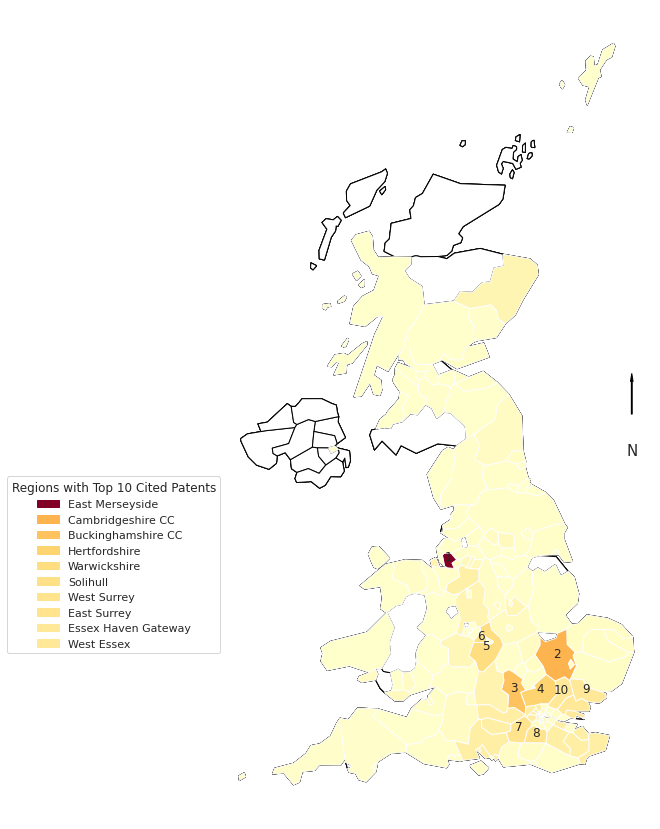

In [544]:
# Set the CRS of CITED_gdf to match the CRS of uk_gdf
cited_counts_gdf = gpd.GeoDataFrame(cited_counts_gdf, geometry='geometry')
cited_counts_gdf = cited_counts_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Add regions to the base map
cited_counts_gdf.plot(ax=base, column='normalized_citation_counts', cmap='YlOrRd')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = cited_counts_gdf.nlargest(10, 'normalized_citation_counts')
top10_colors = top10['normalized_citation_counts']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = cited_counts_gdf['normalized_citation_counts'].min()
vmax = cited_counts_gdf['normalized_citation_counts'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['normalized_citation_counts'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Cited Patents')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')
plt.savefig('Cited_map.png', dpi=300, bbox_inches='tight')

plt.show()

## Self-citation Analysis: a patent cites another patent from the same region -- to understand the extent of local knowledge spillovers.

In [325]:
citation['is_self_citation'] = citation['reg_code_citing'] == citation['reg_code_Cited']

In [338]:
# Calculate the total number of self-citations
total_self_citations = citation['is_self_citation'].sum()

# Calculate the total number of citations
total_citations = len(citation['Cited_App_nbr'])

# Calculate the proportion of self-citations
proportion_self_citations = total_self_citations / total_citations

print(f"The total number of self-citations is {total_self_citations}.")
print(f"The total number of citations is {total_citations}.")
print(f"The proportion of self-citations is {proportion_self_citations}.")

The total number of self-citations is 1613.
The total number of citations is 6206.
The proportion of self-citations is 0.25990976474379635.


In [326]:
citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited,is_self_citation
0,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKI23,1977,True
1,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKJ13,1977,False
2,EP19790301143,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977,False
3,EP19790301145,EP19780100823,A61K031/415,UKH33,1978.0,A61K,UKJ42,1977,False
4,EP19790301144,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977,False


In [343]:
# Group by 'reg_code_citing' and sum the 'is_self_citation' column
self_citations_by_region = citation.groupby('reg_code_citing')['is_self_citation'].sum()
# Convert the Series to a DataFrame
# self_citations_by_region_df = self_citations_by_region.reset_index()
# Sort the results in descending order and take the top 5
top5_regions_self_citations = self_citations_by_region.sort_values(ascending=False).head(5)

print(top5_regions_self_citations)


reg_code_citing
UKJ23    259
UKH23    257
UKH33    179
UKJ42    127
UKD74     72
Name: is_self_citation, dtype: int64


In [344]:
len(self_citations_by_region)

115

In [345]:
# Calculate the total number of patents in each region
total_patents = citation.groupby('reg_code_citing')['Citing_app_nbr'].count()

# Normalize the self citation counts by the total number of patents in each region
normalized_self_citation_counts = self_citations_by_region / total_patents
normalized_self_citation_counts

reg_code_citing
GBZZZ    0.236000
UKC11    0.157895
UKC12    0.000000
UKC13    0.000000
UKC14    0.116279
           ...   
UKN01    0.000000
UKN02    0.000000
UKN03    0.933333
UKN04    0.000000
UKN05    0.000000
Length: 115, dtype: float64

In [354]:
norm_self_df = normalized_self_citation_counts.reset_index()
norm_self_df.columns = ['reg_code_citing','percentage of self citation']
norm_self_df.head()

,reg_code_citing,percentage of self citation
0,GBZZZ,0.236000
1,UKC11,0.157895
2,UKC12,0.000000
3,UKC13,0.000000
4,UKC14,0.116279


In [356]:
len(norm_self_df)

115

In [357]:
print(norm_self_df['percentage of self citation'].isna().sum())

0


In [359]:
new_norm_self = pd.DataFrame(columns=norm_self_df.columns)

for idx, row in norm_self_df.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_norm_self = new_norm_self.append(new_row)
    else:
        new_norm_self = new_norm_self.append(row)
new_norm_self = new_norm_self.reset_index(drop=True)
new_norm_self.head()

,reg_code_citing,percentage of self citation
0,GBZZZ,0.236000
1,UKC11,0.157895
2,UKC12,0.000000
3,UKC13,0.000000
4,UKC14,0.116279


In [360]:
len(new_norm_self)

149

In [361]:
new_norm_self.to_csv('data/Normed_Self_Citation.csv', index = False)

In [362]:
# Merge new_norm_self and gdf
new_norm_self_gdf = new_norm_self.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

In [363]:
print(new_norm_self_gdf['NUTS_ID'].isna().sum())

5


In [364]:
new_norm_self_gdf.sort_values(by='percentage of self citation', ascending=False)

,reg_code_citing,percentage of self citation,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
146,UKN03,0.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
25,UKE12,0.571429,UKE12,3.0,UK,East Riding of Yorkshire,East Riding of Yorkshire,4.0,1.0,1.0,UKE12,"POLYGON ((3647070.873 3450670.921, 3646740.568..."
88,UKJ12,0.500000,UKJ12,3.0,UK,Milton Keynes,Milton Keynes,4.0,1.0,3.0,UKJ12,"POLYGON ((3598326.240 3274989.145, 3591887.371..."
93,UKJ25,0.454386,UKJ25,3.0,UK,West Surrey,West Surrey,4.0,1.0,2.0,UKJ25,"POLYGON ((3596923.404 3201499.040, 3605622.913..."
94,UKJ26,0.454386,UKJ26,3.0,UK,East Surrey,East Surrey,4.0,1.0,2.0,UKJ26,"POLYGON ((3615604.252 3183666.038, 3626671.079..."
...,...,...,...,...,...,...,...,...,...,...,...,...
117,UKL13,0.000000,UKL13,3.0,UK,Conwy and Denbighshire,Conwy and Denbighshire,2.0,2.0,1.0,UKL13,"POLYGON ((3426652.782 3391984.771, 3418965.274..."
118,UKL14,0.000000,UKL14,3.0,UK,South West Wales,South West Wales,4.0,3.0,1.0,UKL14,"POLYGON ((3374887.245 3276373.205, 3365774.843..."
119,UKL17,0.000000,UKL17,3.0,UK,Bridgend and Neath Port Talbot,Bridgend and Neath Port Talbot,2.0,1.0,1.0,UKL17,"POLYGON ((3388756.995 3269942.158, 3392392.929..."
91,UKJ21,0.000000,UKJ21,3.0,UK,Brighton and Hove,Brighton and Hove,4.0,1.0,1.0,UKJ21,"POLYGON ((3615846.228 3124914.978, 3603878.979..."


In [365]:
row = gdf.loc[gdf['NUTS_ID'] == 'UKN03']

print(row.head())

Empty GeoDataFrame
Columns: [NUTS_ID, LEVL_CODE, CNTR_CODE, NAME_LATN, NUTS_NAME, MOUNT_TYPE, URBN_TYPE, COAST_TYPE, FID, geometry]
Index: []


In [424]:
new_norm_self_gdf = new_norm_self_gdf.dropna(subset=['NUTS_ID'])

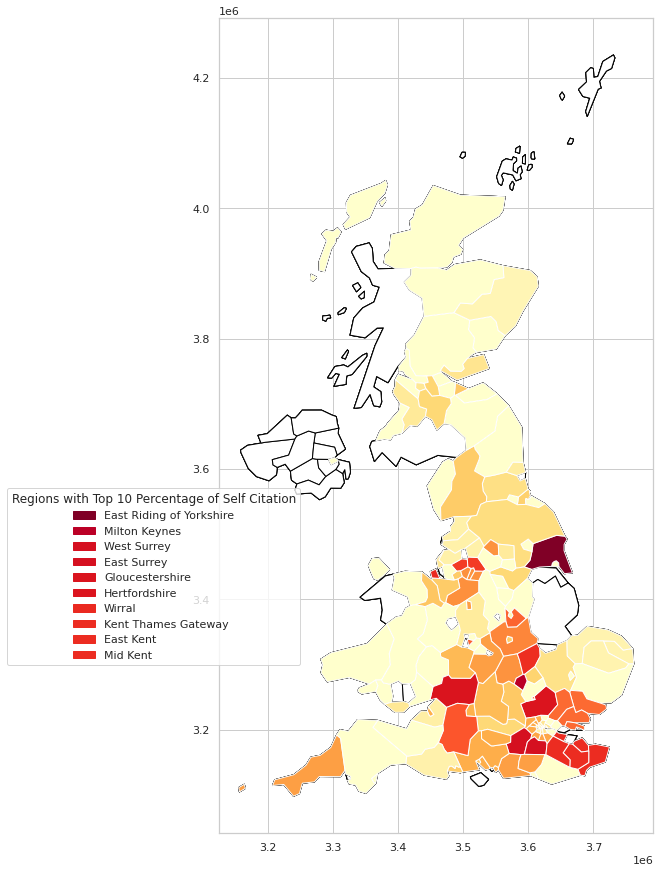

In [425]:
# Set the CRS of self_gdf to match the CRS of uk_gdf
new_norm_self_gdf = gpd.GeoDataFrame(new_norm_self_gdf, geometry='geometry')
new_norm_self_gdf = new_norm_self_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Add regions to the base map
new_norm_self_gdf.plot(ax=base, column='percentage of self citation', cmap='YlOrRd')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = new_norm_self_gdf.nlargest(10, 'percentage of self citation')
top10_colors = top10['percentage of self citation']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = new_norm_self_gdf['percentage of self citation'].min()
vmax = new_norm_self_gdf['percentage of self citation'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend
for idx, row in top10.iterrows():
    color = cmap((row['percentage of self citation'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)

# Create the legend
ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Percentage of Self Citation')

plt.savefig('Self_map.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [56]:
# df_da = df_da.set_index(['reg_code', 'prio_year'])
# y = df_da['app_nbr']
# X = sm.add_constant(df_da.index.get_level_values('prio_year'))
# model = PanelOLS(y, X, entity_effects=True)
# results = model.fit()
# print(results)

### How diversity might influence the number of citations a patent receives: Shannon's entropy

In [545]:
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
0,EP19780300148,3,UKI23,1977
1,EP19780300148,3,UKJ13,1977
2,EP19780100823,6,UKJ42,1977
3,EP19790301145,1,UKH33,1978
4,EP19790301142,1,UKH33,1978


In [112]:
df.head()

,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12


In [128]:
df_sh = df[df['app_nbr'].isin(merged_df['Cited_App_nbr'])]

In [120]:
import numpy as np

In [129]:
grouped_ipc = df_sh.groupby('app_nbr')['IPC'].apply(list)

def shannon_entropy(ipc_list):
    frequencies = pd.Series(ipc_list).value_counts(normalize=True)
    return -np.sum(frequencies * np.log(frequencies))

entropy_values = grouped_ipc.apply(shannon_entropy)

entropy_df = entropy_values.reset_index()
entropy_df.columns = ['app_nbr', 'Shannon_Entropy']

df_sh = pd.merge(df_sh, entropy_df, on='app_nbr', how='left')

df_sh.head()


,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC,Shannon_Entropy
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21,1.098612
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555,1.098612
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00,1.098612
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00,2.079442
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12,2.079442


In [137]:
print(entropy_df['Shannon_Entropy'].isna().sum())

0


In [130]:
merged_df = pd.merge(merged_df, entropy_df, left_on='Cited_App_nbr', right_on='app_nbr', how='left')

In [131]:
merged_df = merged_df.drop(['app_nbr'], axis=1)
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,UKI23,1977,2.302585
1,EP19780300148,3,UKJ13,1977,2.302585
2,EP19780100823,6,UKJ42,1977,2.995732
3,EP19790301145,1,UKH33,1978,2.079442
4,EP19790301142,1,UKH33,1978,1.945910


In [132]:
counts_entropy = merged_df.drop(['reg_code_Cited'], axis = 1)
counts_entropy = counts_entropy.drop_duplicates()
counts_entropy.head()

,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
2,EP19780100823,6,1977,2.995732
3,EP19790301145,1,1978,2.079442
4,EP19790301142,1,1978,1.945910
5,EP19790301557,1,1978,1.386294


In [ ]:
# Some patents in merged_df is not in df_sh
print(counts_entropy['Shannon_Entropy'].isna().sum())

595


In [154]:
# Extract rows where 'Shannon_Entropy' is null
null_entropy = counts_entropy[counts_entropy['Shannon_Entropy'].isnull()]
exists = null_entropy['Cited_App_nbr'].isin(citation['Cited_App_nbr'])
print(exists.value_counts())


True    595
Name: Cited_App_nbr, dtype: int64


In [158]:
cite_entro = citation[citation['Cited_App_nbr'].isin(null_entropy['Cited_App_nbr'])]
cite_entro = cite_entro[['Cited_App_nbr','IPC_Cited']]
cite_entro = cite_entro.drop_duplicates()
cite_entro.head()

,Cited_App_nbr,IPC_Cited
209,EP19810303256,C07J041/00
317,EP19800303328,G01N033/53
339,EP19810109184,B01J027/125
486,EP19820301322,C07H019/06
522,EP19810305206,C07C 213/00


In [159]:
len(cite_entro)

595

In [160]:
grouped_ipc_citation = cite_entro.groupby('Cited_App_nbr')['IPC_Cited'].apply(list)

entropy_values_citation = grouped_ipc_citation.apply(shannon_entropy)

entropy_df_citation = entropy_values_citation.reset_index()
entropy_df_citation.columns = ['Cited_App_nbr', 'Shannon_Entropy']
entropy_df_citation.head()

,Cited_App_nbr,Shannon_Entropy
0,EP19790901156,-0.0
1,EP19800303143,-0.0
2,EP19800303328,-0.0
3,EP19800303457,-0.0
4,EP19800303992,-0.0


In [161]:
counts_entropy.set_index('Cited_App_nbr', inplace=True)
entropy_df_citation.set_index('Cited_App_nbr', inplace=True)
counts_entropy['Shannon_Entropy'].update(entropy_df_citation['Shannon_Entropy'])

counts_entropy.reset_index(inplace=True)
entropy_df_citation.reset_index(inplace=True)

In [546]:
counts_entropy.head()

,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
1,EP19780100823,6,1977,2.995732
2,EP19790301145,1,1978,2.079442
3,EP19790301142,1,1978,1.945910
4,EP19790301557,1,1978,1.386294


In [162]:
print(counts_entropy['Shannon_Entropy'].isna().sum())

0


In [547]:
# Compute the total number of citations for each year
total_citations_per_year = counts_entropy.groupby('prio_year_cited')['in_degree'].sum()

# Compute the cumulative total number of citations from each year to the last year in the dataset
cumulative_citations = total_citations_per_year[::-1].cumsum()[::-1]

# Map the cumulative total number of citations to each patent
counts_entropy['cumulative_citations'] = counts_entropy['prio_year_cited'].map(cumulative_citations)

# Compute the normalized citation counts
counts_entropy['normalized_citations'] = counts_entropy['in_degree'] / counts_entropy['cumulative_citations']
counts_entropy.head()


,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy,cumulative_citations,normalized_citations
0,EP19780300148,3,1977,2.302585,3036,0.000988
1,EP19780100823,6,1977,2.995732,3036,0.001976
2,EP19790301145,1,1978,2.079442,2983,0.000335
3,EP19790301142,1,1978,1.945910,2983,0.000335
4,EP19790301557,1,1978,1.386294,2983,0.000335


In [548]:
counts_entropy.to_csv('Counts_Entropy.csv', index=False)

In [164]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['in_degree']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.61
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.37e-21
Time:                        17:28:30   Log-Likelihood:                -3840.5
No. Observations:                1703   AIC:                             7685.
Df Residuals:                    1701   BIC:                             7696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2278      0.080     

In [549]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['normalized_citations']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_citations   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     9.417
Date:                  Mon, 17 Jul 2023   Prob (F-statistic):            0.00218
Time:                          02:59:25   Log-Likelihood:                 3667.4
No. Observations:                  1703   AIC:                            -7331.
Df Residuals:                      1701   BIC:                            -7320.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

# statistically significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. 

1. The coefficient for Shannon Entropy is 0.4979: for each unit increase in Shannon Entropy, the number of citations a patent receives increases by about 0.498. This result is statistically significant, as the p-value is less than 0.05.

2. The R-squared value is 0.052: only about 5.2% of the variation in the number of citations a patent receives can be explained by its Shannon Entropy. While there is a significant relationship, there are likely other factors not included in this model that also have an impact on the number of citations a patent receives.

3. The residuals: not normally distributed --- the Omnibus test p-value is close to 0, and there is a high degree of skewness and kurtosis. Potentially violate the assumptions of the OLS regression model and may impact the reliability of the results. 

4. The results suggest that the diversity of IPC codes in a patent does have a significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. Identify more other factors that could explain more of this variation.

# Other factors:

1. **Research and Development (R&D) Expenditure**: The amount of money invested in R&D can significantly influence the number of patents: OECD.

2. **Government Policies and Regulations**

3. **Economic Factors**: GDP growth: World Bank, OECD.

4. **Scientific Progress and Technological Change**: The number of scientific publications in related fields.

5. **Education and Human Capital**: The number of graduates in relevant fields, the number of researchers working in the pharmaceutical industry.